Para el EDA, necesitamos responder cuales de las columnas de esta base de datos nos ayuda a lograr los objetivos del proyecto:

- Crear un sistema de recomendacion de videojuegos para usuarios con las consultas requeridas


Y cuales relacionan esta base con las otras bases. Esos seran nuestros objetivos en este EDA. Para este proposito tambien utilizaremos el nuevo Diccionario de Datos.

In [110]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from useful_tools import tipo_de_datos

In [111]:
# Cargar el conjunto de datos users_items
users_items = pd.read_parquet('users_items.parquet')

In [112]:
# Mostrar las primeras filas del DataFrame
print("Primeras y ultimas filas de user_reviews:")
users_items

Primeras y ultimas filas de user_reviews:


,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...,...
5153204,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,346330,BrainBread 2,0,0
5153205,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0,0
5153206,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4,4


In [113]:
# Obtener información sobre el DataFrame
print("\nInformación de users_items:")
print(users_items.info())


Información de users_items:
<class 'pandas.core.frame.DataFrame'>
Index: 5094105 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   steam_id          object
 3   user_url          object
 4   item_id           int64 
 5   item_name         object
 6   playtime_forever  int64 
 7   playtime_2weeks   int64 
dtypes: int64(4), object(4)
memory usage: 349.8+ MB
None


In [114]:
# Verificar la forma (número de filas y columnas) del DataFrame
print("\nForma de user_reviews:", users_items.shape)


Forma de user_reviews: (5094105, 8)


In [115]:
# Verificar valores faltantes en el DataFrame
print("\nValores faltantes en users_items:")
print(users_items.isnull().sum())


Valores faltantes en users_items:
user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64


In [116]:
tipo_de_datos.datatype_per_column(users_items)

Columna 'user_id': [<class 'str'>]
Columna 'items_count': [<class 'int'>]
Columna 'steam_id': [<class 'str'>]
Columna 'user_url': [<class 'str'>]
Columna 'item_id': [<class 'int'>]
Columna 'item_name': [<class 'str'>]
Columna 'playtime_forever': [<class 'int'>]
Columna 'playtime_2weeks': [<class 'int'>]


Realizando estas consultas basicas vemos que el preprocesamiento de users_items ha sido hecho correctamente, ya que no hay objetos con tipos de datos que imposibiliten su utilizacion y tampoco hay datos faltantes.

Siendo asi pasamos a responder nuestras preguntas. Cuales de estas columnas nos ayudan con nuestro objetivo y cuales conectan a esta base con las demas? Separemos las que sí sirven y las que no:


SI

- user_id: Conecta esta base con user_reviews.parquet (user_id).
- items_count: es necesaria para la funcion userdata.
- item_id: Conecta con steam_games.parquet.parquet (id) y con user_reviews.parquet (item_id).
- item_name: Conecta con steam_games.parquet (app_name ó title).
- playtime_forever: importante para funcion UserForGenre.
- playtime_2weeks: posiblemente importante para sistema de recomendacion.


NO

- steam_id
- user_url

eliminaremos las columnas que no sirven.

In [117]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['user_url', 'steam_id']

# Eliminar las columnas del DataFrame user_reviews
users_items = users_items.drop(columnas_a_eliminar, axis=1)

In [118]:
# Mostrar las primeras filas del DataFrame
print("Primeras y ultimas filas de users_items:")
users_items

Primeras y ultimas filas de users_items:


,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10,Counter-Strike,6,0
1,76561197970982479,277,20,Team Fortress Classic,0,0
2,76561197970982479,277,30,Day of Defeat,7,0
3,76561197970982479,277,40,Deathmatch Classic,0,0
4,76561197970982479,277,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...
5153204,76561198329548331,7,346330,BrainBread 2,0,0
5153205,76561198329548331,7,373330,All Is Dust,0,0
5153206,76561198329548331,7,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,7,521570,You Have 10 Seconds 2,4,4


Los registros que tienen playtime_forever cero no tienen razon de ser, no aportan datos relevantes, por lo tanto pueden ser eliminados. En este punto, redujimos la cantidad de registros de 5 millones a 3 millones

In [119]:
# Eliminar las filas donde playtime_forever es cero
users_items = users_items[users_items['playtime_forever'] != 0]

# Mostrar el DataFrame resultante
users_items

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10,Counter-Strike,6,0
2,76561197970982479,277,30,Day of Defeat,7,0
8,76561197970982479,277,300,Day of Defeat: Source,4733,0
9,76561197970982479,277,240,Counter-Strike: Source,1853,0
10,76561197970982479,277,3830,Psychonauts,333,0
...,...,...,...,...,...,...
5153202,76561198329548331,7,304930,Unturned,677,677
5153203,76561198329548331,7,227940,Heroes & Generals,43,43
5153206,76561198329548331,7,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,7,521570,You Have 10 Seconds 2,4,4


Esto hace que el dato en items_count esté incorrecto, hay que corregir el dato.

In [120]:
# Contar las ocurrencias de cada user_id y asignar el resultado a la columna items_count
users_items['items_count'] = users_items.groupby('user_id')['user_id'].transform('count')

# Mostrar el DataFrame resultante
users_items


/var/folders/cc/k93262dx3yz2w0blkmvzstwm0000gq/T/ipykernel_877/2418237015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_items['items_count'] = users_items.groupby('user_id')['user_id'].transform('count')


,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,198,10,Counter-Strike,6,0
2,76561197970982479,198,30,Day of Defeat,7,0
8,76561197970982479,198,300,Day of Defeat: Source,4733,0
9,76561197970982479,198,240,Counter-Strike: Source,1853,0
10,76561197970982479,198,3830,Psychonauts,333,0
...,...,...,...,...,...,...
5153202,76561198329548331,5,304930,Unturned,677,677
5153203,76561198329548331,5,227940,Heroes & Generals,43,43
5153206,76561198329548331,5,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,5,521570,You Have 10 Seconds 2,4,4


Asumiremos que el tiempo de juego está en segundos para que los datos tengan sentido. Esto genera que los datos sean demasiado grandes, vamos a pasarlos a horas.

In [121]:
# Convertir los valores de minutos a horas en la columna playtime_forever
users_items['playtime_forever'] = users_items['playtime_forever'] / 3600

# Convertir los valores de minutos a horas en la columna playtime_2weeks
users_items['playtime_2weeks'] = users_items['playtime_2weeks'] / 3600


/var/folders/cc/k93262dx3yz2w0blkmvzstwm0000gq/T/ipykernel_877/3222310434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_items['playtime_forever'] = users_items['playtime_forever'] / 3600
/var/folders/cc/k93262dx3yz2w0blkmvzstwm0000gq/T/ipykernel_877/3222310434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_items['playtime_2weeks'] = users_items['playtime_2weeks'] / 3600


In [122]:
# Mostrar el DataFrame resultante
users_items

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,198,10,Counter-Strike,0.001667,0.000000
2,76561197970982479,198,30,Day of Defeat,0.001944,0.000000
8,76561197970982479,198,300,Day of Defeat: Source,1.314722,0.000000
9,76561197970982479,198,240,Counter-Strike: Source,0.514722,0.000000
10,76561197970982479,198,3830,Psychonauts,0.092500,0.000000
...,...,...,...,...,...,...
5153202,76561198329548331,5,304930,Unturned,0.188056,0.188056
5153203,76561198329548331,5,227940,Heroes & Generals,0.011944,0.011944
5153206,76561198329548331,5,388490,One Way To Die: Steam Edition,0.000833,0.000833
5153207,76561198329548331,5,521570,You Have 10 Seconds 2,0.001111,0.001111


In [123]:
users_items_pyarrow = pa.Table.from_pandas(users_items)
pq.write_table(users_items_pyarrow, "users_items.parquet")

Para encontrar outliers interesantes deberiamos analizar:
- Cantidad total de jugadores.
- Cantidad total de juegos.
- Cantidad de juegos por usuario.
- Cantidad de jugadores por juego.
- Cantidad de horas por jugador.
- Cantidad de horas por juego.

Cantidad total de jugadores
68403
Cantidad total de juegos en users_items
10050


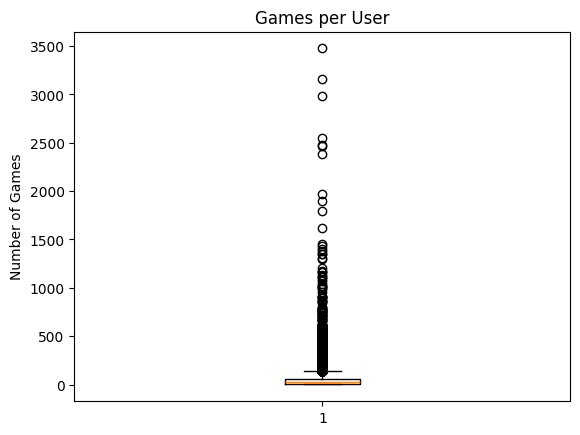

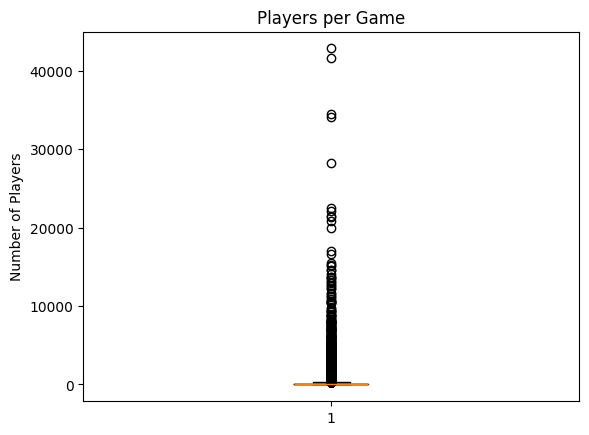

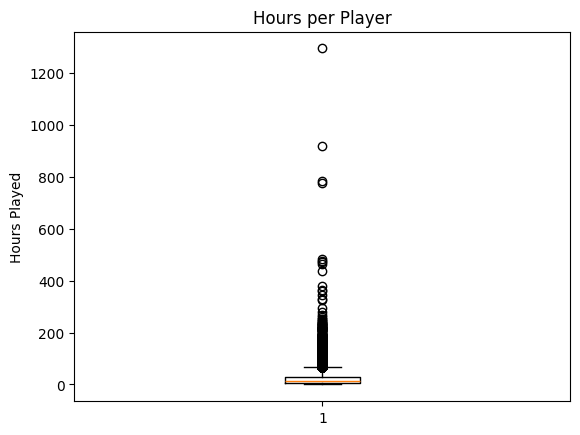

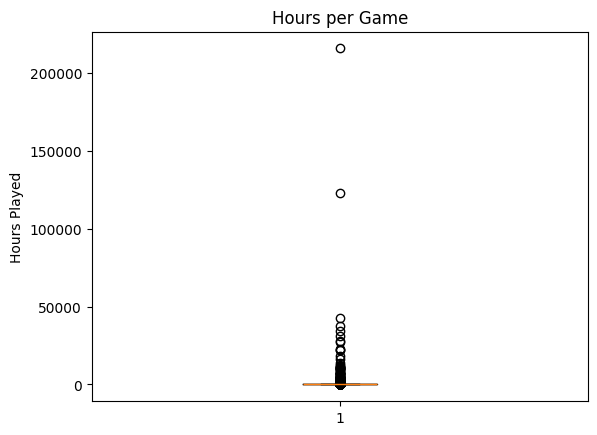

In [124]:
# Cantidad total de jugadores
players_count = users_items['user_id'].nunique()
print('Cantidad total de jugadores')
print(players_count)

# Cantidad total de juegos en users_items
games_count = users_items['item_id'].nunique()
print('Cantidad total de juegos en users_items')
print(games_count)

# Gráfico: Cantidad de juegos por usuario (boxplot)
games_per_user = users_items.groupby('user_id')['item_id'].nunique()
plt.boxplot(games_per_user.values)
plt.title('Games per User')
plt.ylabel('Number of Games')
plt.show()

# Gráfico: Cantidad de jugadores por juego (boxplot)
players_per_game = users_items.groupby('item_id')['user_id'].nunique()
plt.boxplot(players_per_game.values)
plt.title('Players per Game')
plt.ylabel('Number of Players')
plt.show()

# Gráfico: Cantidad de horas por jugador (boxplot)
hours_per_player = users_items.groupby('user_id')['playtime_forever'].sum()
plt.boxplot(hours_per_player.values)
plt.title('Hours per Player')
plt.ylabel('Hours Played')
plt.show()

# Gráfico: Cantidad de horas por juego (boxplot)
hours_per_game = users_items.groupby('item_id')['playtime_forever'].sum()
plt.boxplot(hours_per_game.values)
plt.title('Hours per Game')
plt.ylabel('Hours Played')
plt.show()

- juegos mas jugados en las ultimas dos semanas.
- jugadores con mas horas jugadas en las ultimas dos semanas.

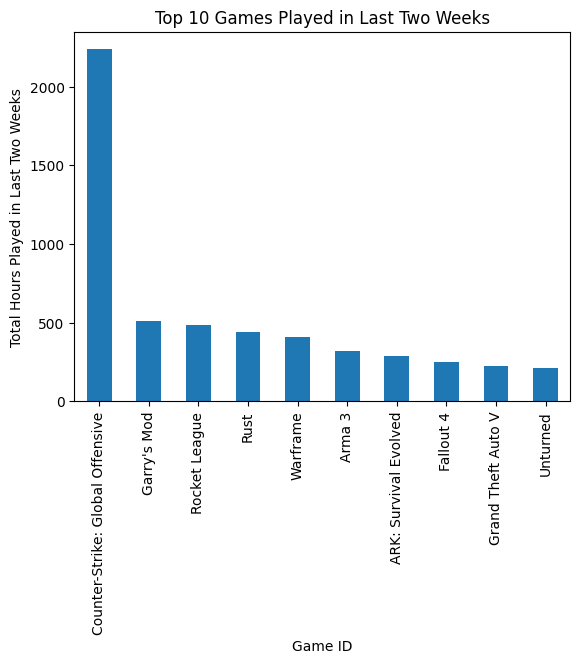

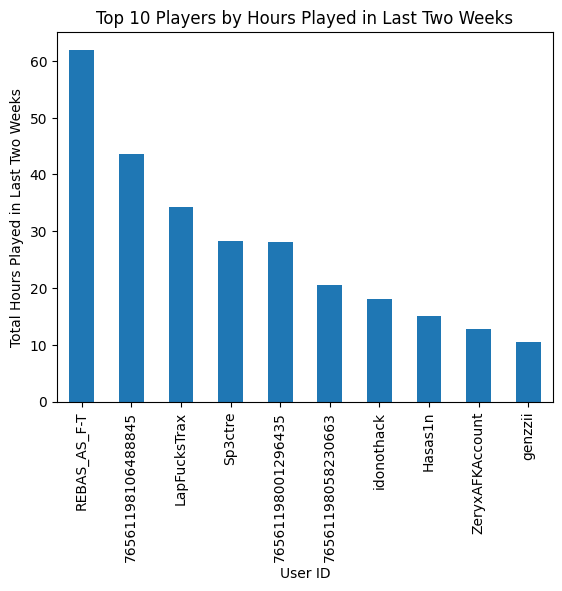

In [126]:
# Graficar los juegos más jugados en las últimas dos semanas
top_games = users_items.groupby('item_name')['playtime_2weeks'].sum().nlargest(10)
top_games.plot(kind='bar', title='Top 10 Games Played in Last Two Weeks')
plt.xlabel('Game ID')
plt.ylabel('Total Hours Played in Last Two Weeks')
plt.show()

# Graficar los jugadores con más horas jugadas en las últimas dos semanas
top_players = users_items.groupby('user_id')['playtime_2weeks'].sum().nlargest(10)
top_players.plot(kind='bar', title='Top 10 Players by Hours Played in Last Two Weeks')
plt.xlabel('User ID')
plt.ylabel('Total Hours Played in Last Two Weeks')
plt.show()

La distribucion de datos el dramáticamente desigual en los cuartiles.